In [33]:
# Importing all the necessary basic libraries.,
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Read the dataset to python environment

In [34]:
data = pd.read_excel(r'D:\D_S & D_A\ICTAK\Datasets\iris xl.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## -> Exploratory Data Analytics;

In [35]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [37]:
data.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [38]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

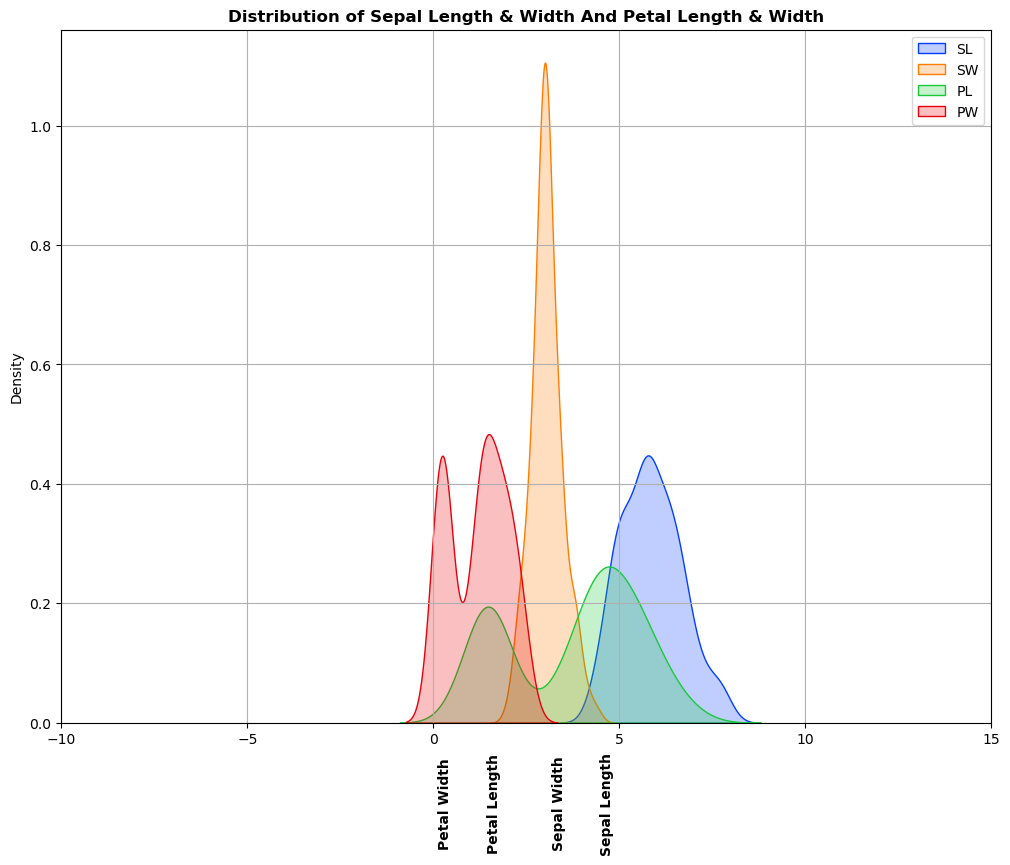

In [112]:
sns.set_palette("bright", 8, 1)
plt.figure(figsize=(12,9))

ax = sns.kdeplot(data['SL'],shade=True)
ax = sns.kdeplot(data['SW'],shade=True)
ax = sns.kdeplot(data['PL'],shade=True)
ax = sns.kdeplot(data['PW'],shade=True)

ax.set_xlim(-10, 15)
ax.set_xlabel('Petal Width''\n''\n''\n''Petal Length''\n''\n''\n''\n''Sepal Width' '\n''\n''\n''Sepal Length', rotation=90, fontweight ='bold')
ax.set_title('Distribution of Sepal Length & Width And Petal Length & Width',fontweight ='bold')
plt.legend(['SL','SW','PL','PW'])
plt.grid()

In [40]:
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


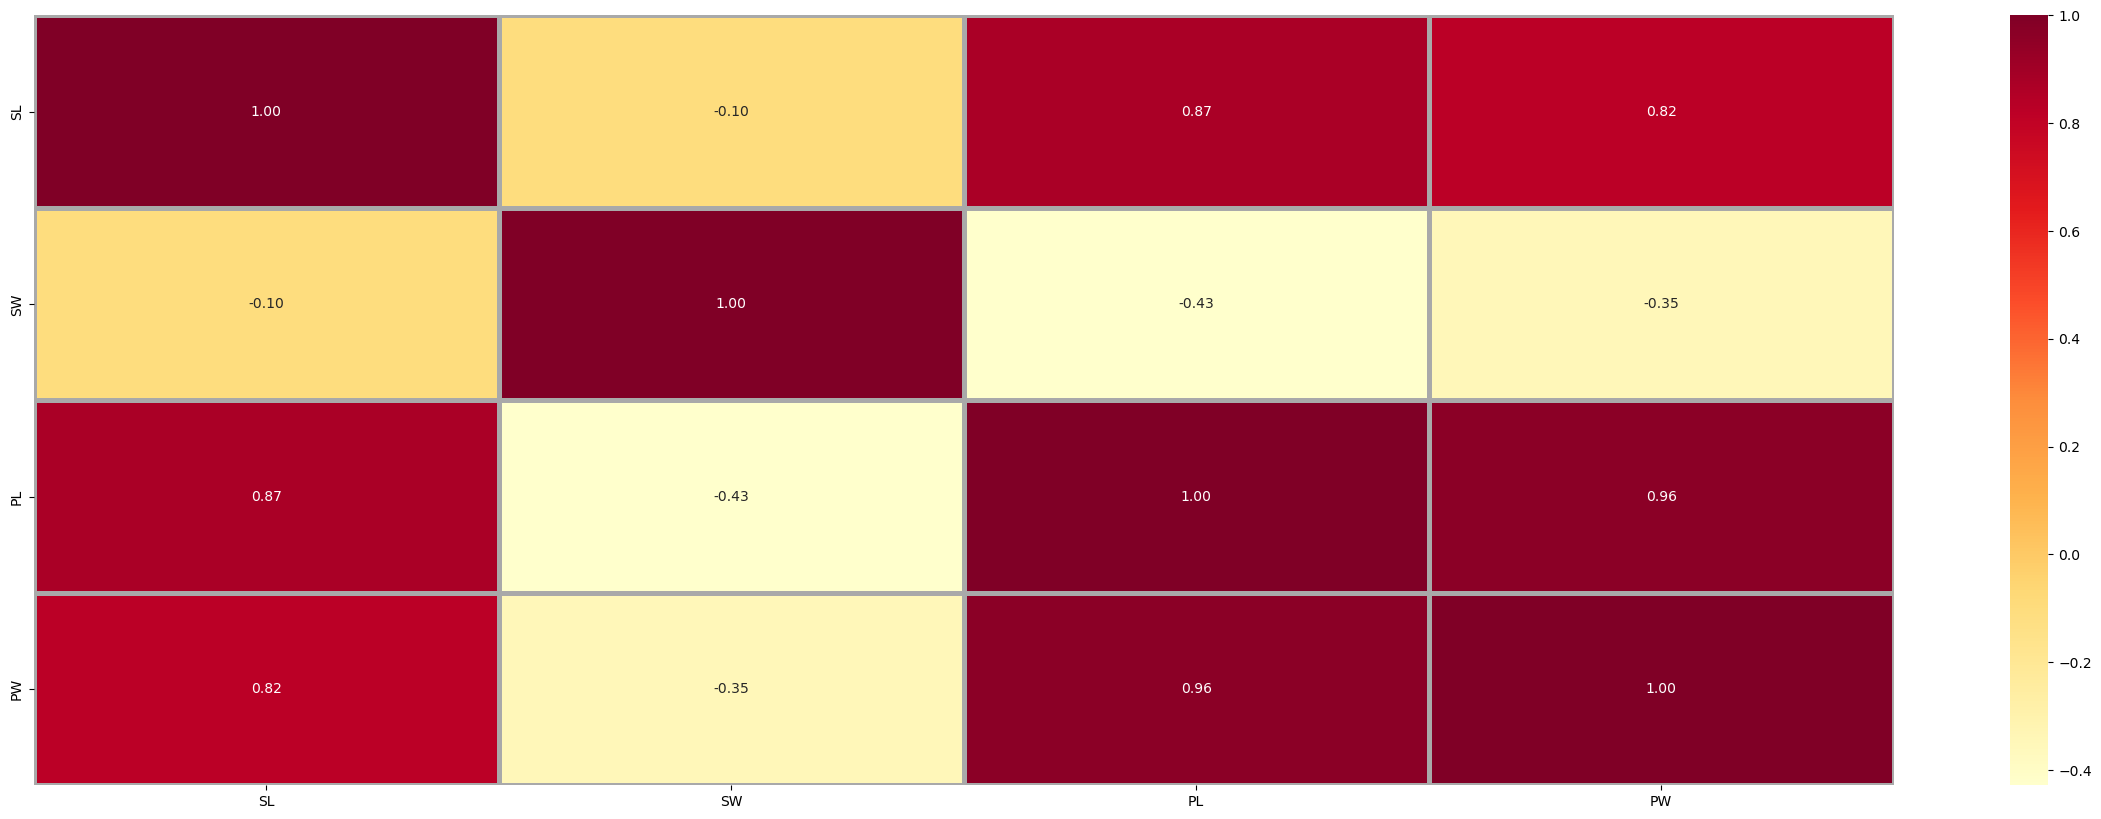

In [41]:
plt.subplots(figsize= (30,10))
sns.heatmap(data.corr(), fmt ='.2f', annot = True, linewidths = 2.5, linecolor = 'darkgrey', cmap = 'YlOrRd')
plt.show()

## 2. Pre-Processing

In [42]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Filling Missing Values:

In [43]:
data.SL.fillna(data.SL.median(),inplace=True)
data.SW.fillna(data.SW.median(),inplace=True)
data.PL.fillna(data.PL.median(),inplace=True)
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

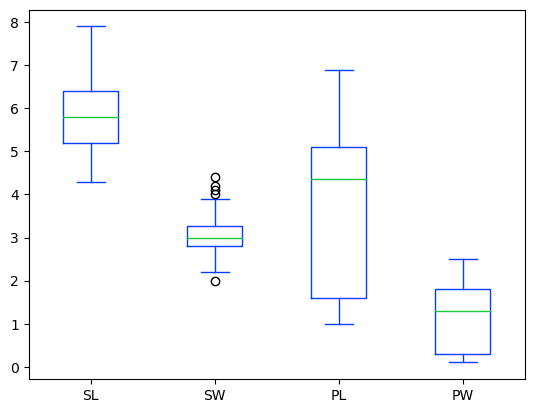

In [44]:
data.plot(kind='box')
plt.show()

                                                                        Spliting the Data for Training and Testing the Model 

In [45]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [46]:
y = data['Classification']
X = data.drop('Classification', axis = 1)
X.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head(3)

,SL,SW,PL,PW
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9


                                                                                            MODEL BUILDING.

In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

# -> LOGISTIC REGRESSION ML MODEL.

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=165)
model_lr = log_reg.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print('Confusion Matrix is:','\n', confusion_matrix(y_test, y_pred_lr))
print('\n','Classification Report:', '\n', classification_report(y_test,y_pred_lr ))

Confusion Matrix is: 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# -> KNN MODEL.

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

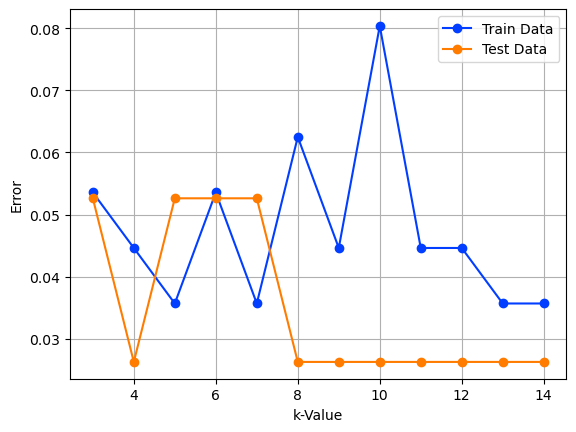

In [50]:
from sklearn.neighbors import KNeighborsClassifier
error_1= []
error_2= []
for k in range(3,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    model1_knn = knn.fit(X_train,y_train)
    y_pred_knn_1= model1_knn.predict(X_train)
    error_1.append(np.mean(y_train!= y_pred_knn_1))
    y_pred_knn_2= model1_knn.predict(X_test)
    error_2.append(np.mean(y_test!= y_pred_knn_2))


plt.plot(range(3,15), error_1, 'o-', label = 'Train Data')
plt.plot(range(3,15), error_2, 'o-', label = 'Test Data')
plt.xlabel('k-Value')
plt.ylabel('Error')
plt.legend()
plt.grid()

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

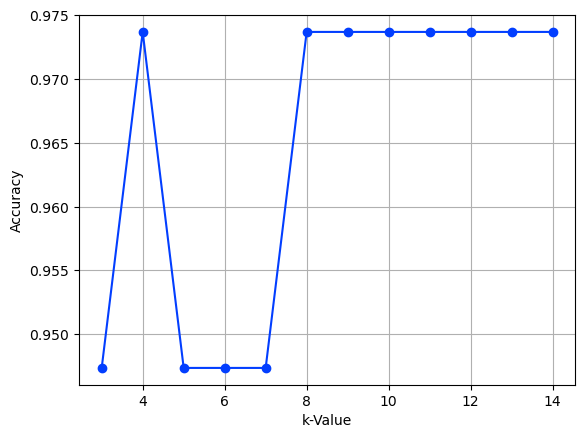

In [51]:
k_matrix = []
neighbors = np.arange(3, 15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model2_knn = knn.fit(X_train, y_train)
    y_pred2_knn = model2_knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred2_knn)
    k_matrix.append(acc)

plt.plot(neighbors, k_matrix,'o-')
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.grid()


From the above error & accuracy plots; I am taking k = 8 as the optimal value for the final KNN ML based Predicitve Model.

In [52]:
knn_1 = KNeighborsClassifier(n_neighbors = 8) # by default metric = ’minkowski’.
knn_model_1 = knn_1.fit(X_train, y_train)
y_pred_knn_1 = knn_model_1.predict(X_test)
print('Confusion Matrix is:','\n', confusion_matrix(y_test, y_pred_knn_1))
print('\n','Classification Report:', '\n', classification_report(y_test,y_pred_knn_1 ))

Confusion Matrix is: 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
knn_2 = KNeighborsClassifier(n_neighbors = 8, metric = 'canberra')
knn_model_2 = knn_2.fit(X_train, y_train)
y_pred_knn_2 = knn_model_2.predict(X_test)
print('Confusion Matrix is:','\n', confusion_matrix(y_test, y_pred_knn_2))
print('\n','Classification Report:', '\n', classification_report(y_test,y_pred_knn_2))

Confusion Matrix is: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                                                                                        SUPPORT VECTOR MACHINE.

In [54]:
from sklearn.svm import SVC

#    => LINEAR SVM KERNEL;

In [55]:
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X_train, y_train)
y_pred_svm1 = svm_clf.predict(X_test)
print('Confusion Matrix is:','\n', confusion_matrix(y_test, y_pred_svm1))
print('\n','Classification Report:', '\n', classification_report(y_test, y_pred_svm1))

Confusion Matrix is: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



#    => RADIAL BASIS FUNCTION (RBF) SVM KERNEL;

In [56]:
svm_clf_rbf = SVC(kernel='rbf')
svm_model = svm_clf_rbf.fit(X_train, y_train)
y_pred_rbf = svm_clf_rbf.predict(X_test)
print('Confusion Matrix is:','\n', confusion_matrix(y_test, y_pred_rbf))
print('\n','Classification Report:', '\n', classification_report(y_test, y_pred_rbf))

Confusion Matrix is: 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# => POLYNOMIAL SVM KERNEL;

In [57]:
svm_clf_p = SVC(kernel='poly', degree = 2)
svm_model = svm_clf_p.fit(X_train, y_train)
y_pred_p = svm_clf_p.predict(X_test)
print('Confusion Matrix is:','\n', confusion_matrix(y_test, y_pred_p))
print('\n','Classification Report:', '\n', classification_report(y_test, y_pred_p))

Confusion Matrix is: 
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# -> DECISION TREE MODEL.

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(X_train, y_train)
y_pred_dtm = dtm_clf.predict(X_test)
print('Confusion Matrix is:','\n', confusion_matrix(y_test, y_pred_dtm))
print('\n','Classification Report:', '\n', classification_report(y_test, y_pred_dtm))

Confusion Matrix is: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [59]:
from sklearn import tree

In [60]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [61]:
features = ["SL",'PL','SW','PW']
classifiers = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

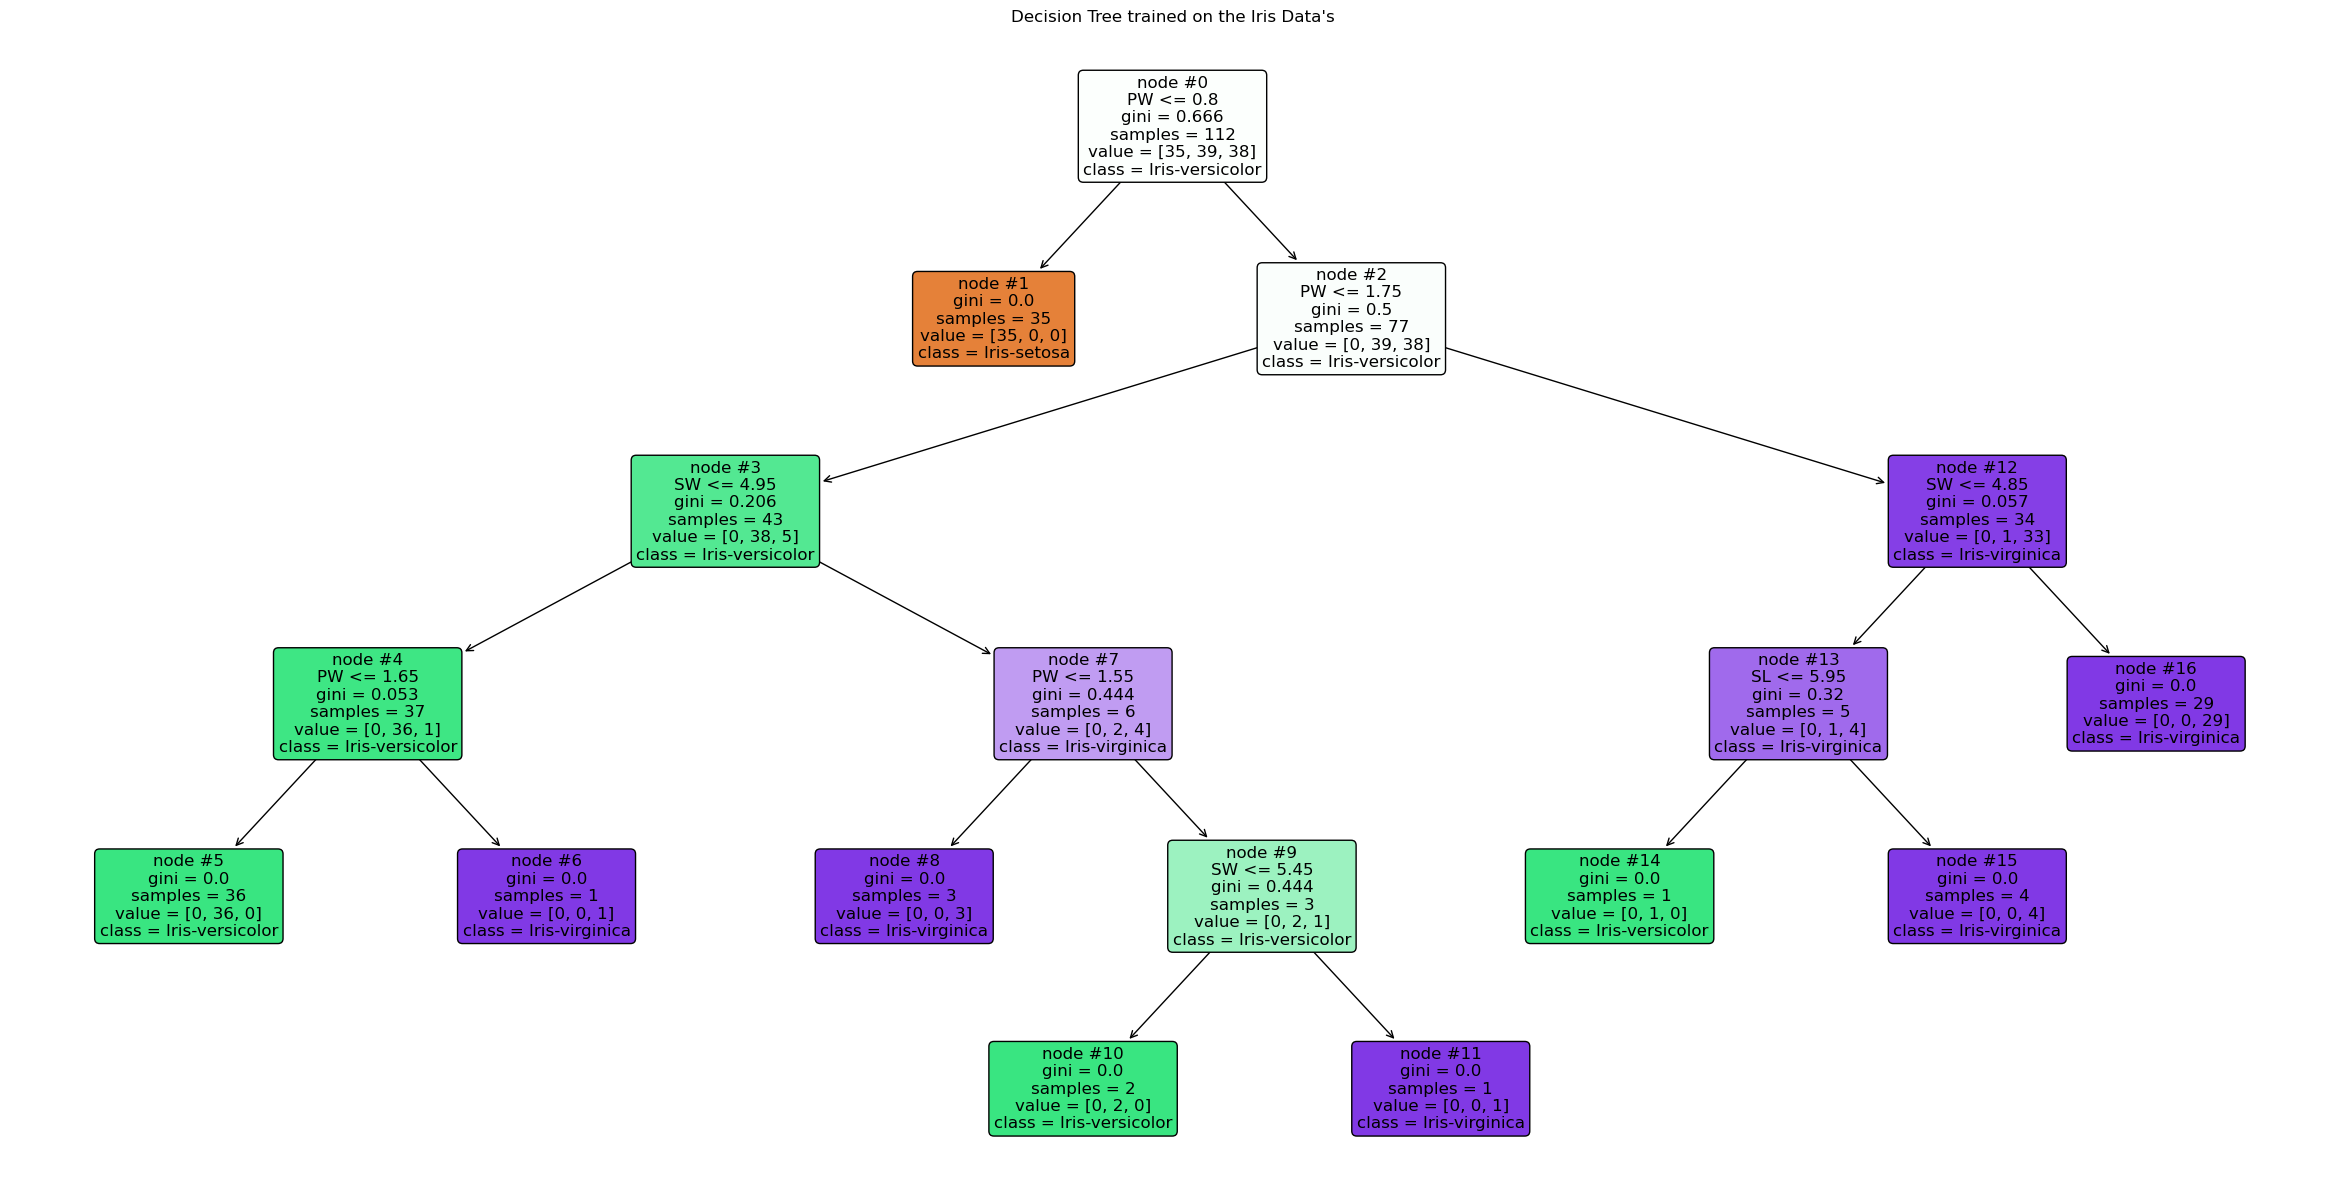

In [62]:
plt.figure(figsize=(30,15))
tree.plot_tree(dtm_clf, feature_names = features, class_names = classifiers, filled = True, rounded= True, label='all', node_ids=True, fontsize=12)
plt.title("Decision Tree trained on the Iris Data's")
plt.show()

# -> RANDOM FOREST MODEL.

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(X_train, y_train)
y_pred_rfm = rfm_clf.predict(X_test)
print('Confusion Matrix is:','\n', confusion_matrix(y_test, y_pred_rfm))
print('\n','Classification Report:', '\n', classification_report(y_test, y_pred_rfm))

Confusion Matrix is: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



# INFERENCE.

In [64]:
print('Accuracy Percentage of LOGISTIC REGRESSION Model:-', accuracy_score(y_test, y_pred_lr)*100,'%')
print('Accuracy Percentageof KNN (Minkowski Distance Computation) Model:-', accuracy_score(y_test, y_pred_knn_1)*100,'%')
print('Accuracy Percentageof KNN (Canberra Distance Computation) Model:-', accuracy_score(y_test, y_pred_knn_2)*100,'%')
print('Accuracy Percentages for various SUPPORT VECTOR MACHINE Models:-')
print('\t SVM LINEAR KERNAL Model:-', accuracy_score(y_test, y_pred_svm1)*100,'%')
print('\t SVM RADIAL BASIS FUNCTION KERNAL Model:-', accuracy_score(y_test, y_pred_rbf)*100,'%')
print('\t SVM POLYNOMIAL KERNAL Model:-', accuracy_score(y_test, y_pred_p)*100,'%')
print('Accuracy Percentage of DECISION TREE Model:-', accuracy_score(y_test, y_pred_dtm)*100,'%')
print('Accuracy Percentage of RANDOM FOREST Model:-', accuracy_score(y_test, y_pred_rfm)*100,'%')

Accuracy Percentage of LOGISTIC REGRESSION Model:- 97.36842105263158 %
Accuracy Percentageof KNN (Minkowski Distance Computation) Model:- 97.36842105263158 %
Accuracy Percentageof KNN (Canberra Distance Computation) Model:- 100.0 %
Accuracy Percentages for various SUPPORT VECTOR MACHINE Models:-
	 SVM LINEAR KERNAL Model:- 100.0 %
	 SVM RADIAL BASIS FUNCTION KERNAL Model:- 97.36842105263158 %
	 SVM POLYNOMIAL KERNAL Model:- 97.36842105263158 %
Accuracy Percentage of DECISION TREE Model:- 100.0 %
Accuracy Percentage of RANDOM FOREST Model:- 100.0 %


## 3. Find out which classification model gives the best result.
From the above inferences; I could finalize "KNN (Canberra Distance Computation) MODEl" , "SVM LINEAR KERNAL MODEL" , "DECISSION TREE MODEL" & "RANDOM FOREST MODEL" with an "ACCURACY SCORE of 1.0" would be more optimal for the Predicitive Analytics of IRIS SPECIES DATASET.